# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Disconnect and delete runtime`을 누르고 새로 시작하시면 될 수도 있습니다.

Colab 상에서 파일 경로나 디렉토리를 더 쉽게 보고 싶은 분들은, 화면 왼쪽의 아이콘들 중 가장 아래 폴더 아이콘을 눌러서 볼 수 있습니다.

`Runtime->Run All`으로 실행했을 때, `wget`이나 `rsync` 명령이 연결이 잘 안 되어 중간에 에러가 일부 날 수 있지만 해당 셀만 다시 실행하면 해결되는 경우도 있습니다. 해당되는 셀에는 셀의 앞이나 뒤에 추가 설명을 작성하였으니 참고해 주세요.

Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

## Figure 4D 재현


자! bam 파일에 담긴 aligned reads와 gtf 파일에 담긴 gene annotation으로 gene별 read count를 구합니다.

In [ ]:
# !cd binfo1-datapack1/
# !featureCounts -a ../gencode.vM27.annotation.gtf -o read-counts.txt *.bam

결과를 pandas로 읽어와 봅니다.

In [1]:
%cd binfo1-datapack1/

/home/hoon/bioinfo1/binfo1-datapack1


In [2]:
!pwd

/home/hoon/bioinfo1/binfo1-datapack1


In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

cnts = pd.read_csv('read_counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이 그림에는 문제가 많이 있습니다. 논문의 그림 Figure 4D처럼 한 번 만들어 봅시다~

In [ ]:
# 여기에 코드를 새로 작성해서 논문의 그림과 비슷하게 만들어 봅니다.
# TODO: read article, track down the preprocessing steps, draw the figure

'''
For quantification of mRNA abundance (from RNA-seq) and ribosome occupancy (from ribosome footprinting), the tags were
aligned to nonredundant RefSeq sequences. We excluded transcripts with low ribosome occupancy (<80 raw reads in siLuc) to
reduce noise. Ribosome density of a transcript was calculated as the log 2 ratio between the read counts of ribosome footprints
and the RNA-seq tag counts that were mapped to coding sequences (-15 from start and stop codon positions for 50-end of sequence
reads). Then, the ratios were normalized by the total read counts and were used to calculate density changes, defined as arithmetic
differences in log 2 ribosome densities between control and Lin28a knockdown samples.

Correlation analyses between LIN28A CLIP enrichment and mRNA abundance change (Figure 4A) or ribosome density change (Figure 4D) were done with
log2 enrichment level of the 35L33G CLIP library and the control RNA-seq library or
log2 fold change of ribosome density from ribosome footprinting experiment, respectively.
Ribosome densities were processed as described in the previous section.
We excluded transcripts with low read counts in RNA-seq (<30 raw reads) or low ribosome footprints (<80 raw footprint tags
in siLuc library). Pearson’s correlation coefficient was calculated by using stats package in SciPy (http://www.scipy.org).
'''


In [4]:
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


In [5]:
for col in cnts.columns:
    if 'bam' in col:
        cnts['norm-' + col] = 1e6 * cnts[col] / cnts[col].sum()

cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam
Geneid,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,0.293450,0.192277,0.081049,0.102577,0.0,0.0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0.220087,0.000000,0.000000,0.000000,0.0,0.0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
eps = 1e-13

In [7]:
cnts['clip_enrichment'] = np.log2((cnts['norm-CLIP-35L33G.bam'] + eps) / (cnts['norm-RNA-control.bam'] + eps))
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment
Geneid,,,,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,0.293450,0.192277,0.081049,0.102577,0.0,0.0,0.609930
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0.220087,0.000000,0.000000,0.000000,0.0,0.0,41.001214
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [8]:
preprocess = None
preprocess = cnts[(cnts['RPF-siLuc.bam'] >= 80) & (cnts['RNA-control.bam'] >= 30)].copy()
# Exclude transcripts with low read counts in RNA-seq(< 30 raw reads)?
# preprocess = preprocess[(preprocess['RNA-control.bam'] >= 30)]
# preprocess = cnts.copy()
preprocess.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment
Geneid,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,3191,294.477015,260.535037,244.928791,262.904503,173.833162,246.746805,0.176678
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,609,121.635000,146.514906,172.633463,228.233523,30.670940,47.091446,-0.268489
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,1128,81.505721,91.139194,102.121203,105.756747,56.385905,87.223565,-0.161170
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,251,111.510977,53.837498,56.247710,92.626908,12.343183,19.408790,1.050502
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,138,257.355598,101.714417,191.274635,182.073934,19.449864,10.670968,1.339239


In [ ]:
# for col in ['RPF-siLin28a.bam', 'RNA-siLin28a.bam', 'RPF-siLuc.bam', 'RNA-siLuc.bam']:
#     preprocess['norm-' + col] = 1e6 * preprocess[col] / preprocess[col].sum()
# preprocess.head()

In [9]:
# preprocess['rden_Luc'] = np.log2((preprocess['norm-RPF-siLuc.bam'] + 1e-6) / (preprocess['norm-RNA-siLuc.bam'] + 1e-6))
# preprocess['rden_Lin28a'] = np.log2((preprocess['norm-RPF-siLin28a.bam'] + 1e-6) / (preprocess['norm-RNA-siLin28a.bam'] + 1e-6))
preprocess['rden_Luc'] = np.log2((preprocess['norm-RPF-siLuc.bam'] + eps) / (preprocess['norm-RNA-siLuc.bam'] + eps))
preprocess['rden_Lin28a'] = np.log2((preprocess['norm-RPF-siLin28a.bam'] + eps) / (preprocess['norm-RNA-siLin28a.bam'] + eps))
preprocess['rden_change'] = preprocess['rden_Lin28a'] - preprocess['rden_Luc']
preprocess.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,...,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment,rden_Luc,rden_Lin28a,rden_change
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,...,294.477015,260.535037,244.928791,262.904503,173.833162,246.746805,0.176678,-0.091507,-0.494659,-0.403152
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,...,121.635000,146.514906,172.633463,228.233523,30.670940,47.091446,-0.268489,-2.276974,-2.492768,-0.215794
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,...,81.505721,91.139194,102.121203,105.756747,56.385905,87.223565,-0.161170,-0.277960,-0.856876,-0.578916
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,...,111.510977,53.837498,56.247710,92.626908,12.343183,19.408790,1.050502,-2.254721,-2.188080,0.066641
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,...,257.355598,101.714417,191.274635,182.073934,19.449864,10.670968,1.339239,-4.092761,-3.297814,0.794948


In [10]:
preprocess

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,...,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment,rden_Luc,rden_Lin28a,rden_change
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,...,294.477015,260.535037,244.928791,262.904503,173.833162,246.746805,0.176678,-0.091507,-0.494659,-0.403152
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,...,121.635000,146.514906,172.633463,228.233523,30.670940,47.091446,-0.268489,-2.276974,-2.492768,-0.215794
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,...,81.505721,91.139194,102.121203,105.756747,56.385905,87.223565,-0.161170,-0.277960,-0.856876,-0.578916
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,...,111.510977,53.837498,56.247710,92.626908,12.343183,19.408790,1.050502,-2.254721,-2.188080,0.066641
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,...,257.355598,101.714417,191.274635,182.073934,19.449864,10.670968,1.339239,-4.092761,-3.297814,0.794948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000064358.1,chrM,8607,9390,+,784,6,56,86,50,72,...,0.440175,10.767500,6.970177,5.128843,6.732645,7.268630,-4.612463,0.503050,-0.050022,-0.553072
ENSMUSG00000064363.1,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,...,27.364207,413.395077,407.512230,433.284674,307.831507,193.159987,-3.917159,-1.165519,-0.404702,0.760816
ENSMUSG00000064367.1,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,...,268.873508,1015.413676,1260.224278,1785.658052,559.744653,410.213663,-1.917068,-2.122008,-1.170840,0.951169


In [11]:
preprocess['rden_change'].describe(), preprocess['clip_enrichment'].describe()

(count    7997.000000
 mean       -0.263130
 std         0.585138
 min        -2.233198
 25%        -0.676275
 50%        -0.277640
 75%         0.140745
 max         2.042844
 Name: rden_change, dtype: float64,
 count    7997.000000
 mean       -0.618131
 std         1.432926
 min       -46.478747
 25%        -1.403942
 50%        -0.603474
 75%         0.203581
 max         5.598387
 Name: clip_enrichment, dtype: float64)

In [ ]:
# preprocess = preprocess[preprocess['RNA-control.bam'] >= 30]
# preprocess = preprocess[preprocess['RPF-siLuc.bam'] >= 80]

In [13]:

# Pearson correlation done by Scipy.stats, r=0.4028
from scipy.stats import pearsonr

temp = preprocess[(preprocess['RNA-control.bam'] >= 30)
                  & (preprocess['RPF-siLuc.bam'] >= 80)
                  & (preprocess['RNA-siLuc.bam'] >= 30)
                  & (preprocess['RPF-siLin28a.bam'] >= 80)
                  & (preprocess['RNA-siLin28a.bam'] >= 30)
                #   & (preprocess['CLIP-35L33G.bam'] >= 30)
                 ].copy()
rvalue, pvalue = pearsonr(temp['rden_change'], temp['clip_enrichment'])
print(rvalue)

0.4059963917872278


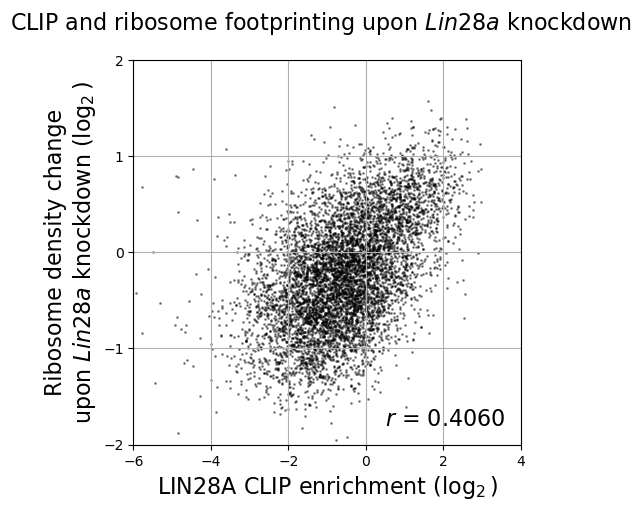

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(temp['clip_enrichment'],
           temp['rden_change'], s=1, c='black', alpha=0.4)
ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)', fontsize=16)
ax.set_ylabel(r'Ribosome density change' + '\n' + r'upon $\mathit{Lin28a}$ knockdown ($\log_2$)', fontsize=16)
# ax.set_title(r'CLIP and ribosome footprinting upon $\mathit{Lin28a}$ knockdown', fontsize=16)
fig.suptitle(r'CLIP and ribosome footprinting upon $\mathit{Lin28a}$ knockdown', fontsize=16)

xstart = -6
xend = 4
ax.set_xlim(xstart, xend)
ax.set_xticks(np.arange(xstart, xend + 1, 2))

ystart = -2
yend = 2
ax.set_ylim(ystart, yend)
ax.set_yticks(np.arange(ystart, yend + 1, 1))

ax.text(0.5, -1.8, r'$r$ = %.4f' % rvalue, fontsize=16)

ax.grid()
plt.show()

## Protein localization 반영하기

논문 그림(Figure 5B, S6A)에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [15]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal = pd.read_csv('mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [16]:
# 여기에 새로 코드를 작성해서 논문 그림과 비슷하게 만들어 봅시다.
temp.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,...,norm-CLIP-35L33G.bam,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment,rden_Luc,rden_Lin28a,rden_change
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,...,294.477015,260.535037,244.928791,262.904503,173.833162,246.746805,0.176678,-0.091507,-0.494659,-0.403152
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,...,121.635000,146.514906,172.633463,228.233523,30.670940,47.091446,-0.268489,-2.276974,-2.492768,-0.215794
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,...,81.505721,91.139194,102.121203,105.756747,56.385905,87.223565,-0.161170,-0.277960,-0.856876,-0.578916
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,...,111.510977,53.837498,56.247710,92.626908,12.343183,19.408790,1.050502,-2.254721,-2.188080,0.066641
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,...,257.355598,101.714417,191.274635,182.073934,19.449864,10.670968,1.339239,-4.092761,-3.297814,0.794948


In [17]:
temp['gene_id'] = [gene.split('.')[0] for gene in temp.index]
temp.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,...,norm-RNA-control.bam,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment,rden_Luc,rden_Lin28a,rden_change,gene_id
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,...,260.535037,244.928791,262.904503,173.833162,246.746805,0.176678,-0.091507,-0.494659,-0.403152,ENSMUSG00000033845
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,...,146.514906,172.633463,228.233523,30.670940,47.091446,-0.268489,-2.276974,-2.492768,-0.215794,ENSMUSG00000033813
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,...,91.139194,102.121203,105.756747,56.385905,87.223565,-0.161170,-0.277960,-0.856876,-0.578916,ENSMUSG00000033793
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,...,53.837498,56.247710,92.626908,12.343183,19.408790,1.050502,-2.254721,-2.188080,0.066641,ENSMUSG00000025907
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,...,101.714417,191.274635,182.073934,19.449864,10.670968,1.339239,-4.092761,-3.297814,0.794948,ENSMUSG00000051285


In [18]:
temp['type'] = temp['gene_id'].apply(lambda x: mouselocal[mouselocal['gene_id'] == x]['type'].values[0] if len(mouselocal[mouselocal['gene_id'] == x]) > 0 else 'NA')
temp.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,...,norm-RNA-siLin28a.bam,norm-RNA-siLuc.bam,norm-RPF-siLin28a.bam,norm-RPF-siLuc.bam,clip_enrichment,rden_Luc,rden_Lin28a,rden_change,gene_id,type
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000033845.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4843429;4843434;4844659;4846600;4847748;484774...,4844739;4847024;4844739;4847024;4847871;484787...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,8487,4014,1355,3022,2563,1859,...,244.928791,262.904503,173.833162,246.746805,0.176678,-0.091507,-0.494659,-0.403152,ENSMUSG00000033845,NA
ENSMUSG00000033813.16,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4928037;4928261;4937693;4937693;4948250;494825...,4928199;4928726;4937755;4937755;4948355;494835...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,3017,1658,762,2130,2225,328,...,172.633463,228.233523,30.670940,47.091446,-0.268489,-2.276974,-2.492768,-0.215794,ENSMUSG00000033813,NA
ENSMUSG00000033793.13,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5140241;5153303;5153333;5153347;5153355;515335...,5140367;5153501;5153848;5153501;5153501;515350...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,9746,1111,474,1260,1031,603,...,102.121203,105.756747,56.385905,87.223565,-0.161170,-0.277960,-0.856876,-0.578916,ENSMUSG00000033793,NA
ENSMUSG00000025907.15,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,6276421;6276451;6284869;6284887;6285232;629382...,6276494;6276494;6285181;6285181;6285476;629396...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,14690,1520,280,694,903,132,...,56.247710,92.626908,12.343183,19.408790,1.050502,-2.254721,-2.188080,0.066641,ENSMUSG00000025907,nucleus
ENSMUSG00000051285.18,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,7159144;7159154;7159328;7159390;7190418;721786...,7159440;7159440;7159440;7159440;7190839;721796...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6654,3508,529,2360,1775,208,...,191.274635,182.073934,19.449864,10.670968,1.339239,-4.092761,-3.297814,0.794948,ENSMUSG00000051285,cytoplasm


In [19]:
cmap = {
    'NA': "#ffffff",
    'nucleus': "#45529f",
    'integral membrane': "#b22945",
    'cytoplasm': "#6aab3f",
}
temp['color'] = temp['type'].map(cmap)
temp['color'].fillna("#ffffff", inplace=True)

/tmp/ipykernel_68967/2517941878.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp['color'].fillna("#ffffff", inplace=True)


In [20]:
colored_temp = temp[temp['color'] != "#ffffff"]

/tmp/ipykernel_68967/2477144479.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(xstart, xend + 1, 2), fontsize=13, family='sans-serif')


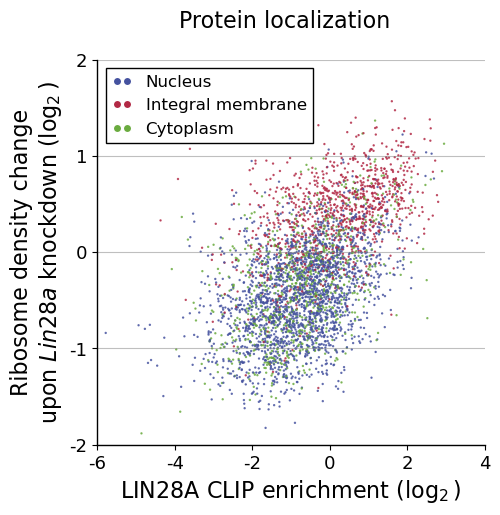

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(colored_temp['clip_enrichment'],
           colored_temp['rden_change'], s=0.5, c=colored_temp['color'], alpha=0.8)

ax.set_xlabel(r'LIN28A CLIP enrichment ($\log_2$)', fontsize=16)
ax.set_ylabel(r'Ribosome density change' + '\n' + r'upon $\mathit{Lin28a}$ knockdown ($\log_2$)', fontsize=16)
# ax.set_title(r'CLIP and ribosome footprinting upon $\mathit{Lin28a}$ knockdown', fontsize=16)
fig.suptitle(r'Protein localization', fontsize=16)

xstart = -6
xend = 4
ax.set_xlim(xstart, xend)
ax.set_xticklabels(np.arange(xstart, xend + 1, 2), fontsize=13, family='sans-serif')

ystart = -2
yend = 2
ax.set_ylim(ystart, yend)
ax.set_yticks(np.arange(ystart, yend + 1, 1))
ax.set_yticklabels(np.arange(ystart, yend + 1, 1), fontsize=13, family='sans-serif')

ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_edgecolor('black')
ax.spines['left'].set_edgecolor('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', color='gray', alpha=0.5)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=r'Nucleus',
           markerfacecolor='#45529f',   markersize=6),
    Line2D([0], [0], marker='o', color='w', label=r'Integral membrane',
           markerfacecolor='#b22945',    markersize=6),
    Line2D([0], [0], marker='o', color='w', label=r'Cytoplasm',
           markerfacecolor='#6aab3f',  markersize=6),
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, numpoints=2, framealpha=1, handlelength=1.2,
          frameon=True, fancybox=False, edgecolor='black', facecolor='white', shadow=False)
plt.show()

In [ ]:
# TODO: add more filtering steps